

```
• DOMAIN: Digital content management
• CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc.
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.
• DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the
date of the following post and links within a post are denoted by the label url link.
• PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.
```



# 1. Read and Analyse Dataset. [5 Marks]

A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]

In [ ]:
!pip install langdetect --quiet

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from langdetect import detect
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from gensim.models import Word2Vec, word2vec
import string
import random
import json
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
# Summary of baseline models
# Function to return summary of baseline models
# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer
import time, psutil, os

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD
np.random.seed(42)
random.seed(42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Coping the content into google drive
!cp "/content/drive/My Drive/NLP/Assignment_1/blogs.zip" .

In [ ]:
#Unzip blogs.zip only if blogtext.csv file is not present.
import glob
fileList = glob.glob("blogtext.csv")
if len(fileList) ==0:
  !unzip blogs.zip

In [ ]:
#Read the CSV file
df = pd.read_csv('blogtext.csv')

In [ ]:
df.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


Checking the info of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


` 1) There is no null value in any of the column \n
  2) There are total 68124 entries and all columns contain not null value`

 Check for null value in dataframe

In [ ]:
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

Observation: There is no null value in any of the columns of dataframe


 Check the shape of the dataframe

In [ ]:
df.shape

(681284, 7)

There are total 681284 records having 7 columns

Checking how many data are present for each topic

In [ ]:
df.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

 Observation: There are some blogger which received less number of comments

#B. Clean the Structured Data [3 Marks]

i. Missing value analysis and imputation. [1 Marks]

In [ ]:
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

Observation

*   There is no null value in any of the column. So there is no need 
*   Some of the higly commented topics are indUnk, Student, Technology,Arts, Education
*   DataSet is not balanced
*   Model will biased towards topic which contains large amount of data






of any imputation

* EDA

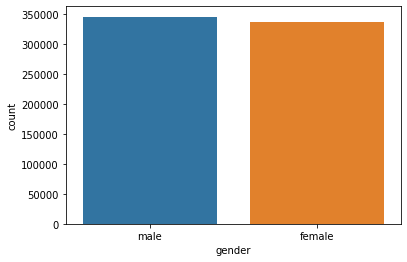

In [ ]:
sns.countplot(x='gender',data=df)

Observation: Data is almost equally distributed amoung male and female

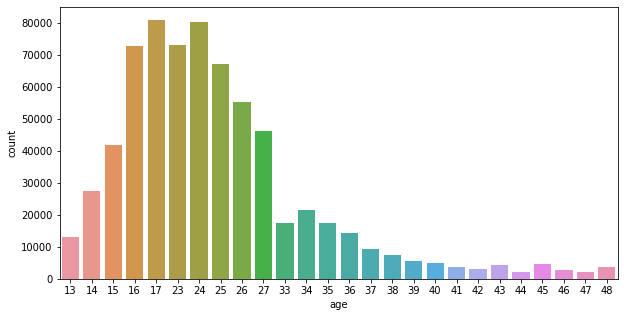

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='age',data=df)

Observation: 

*   Most of the bloggers age are between 16 to 27.
*   Data is rightly skewed
*   Age is normally distributed





(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

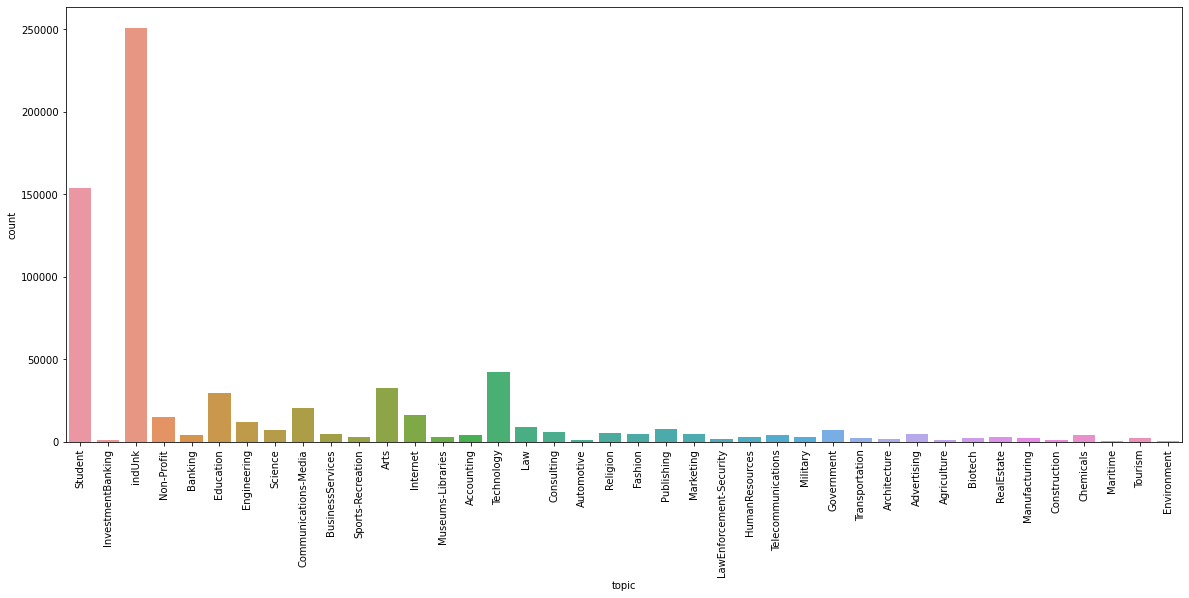

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='topic',data=df)
plt.xticks(rotation=90)

Observations:

*   Dataset contains maximum number of IndUnk topic
*   Student comes second after Indunk
*   Some miniority topics are Environment, Maritime






Bivaraint

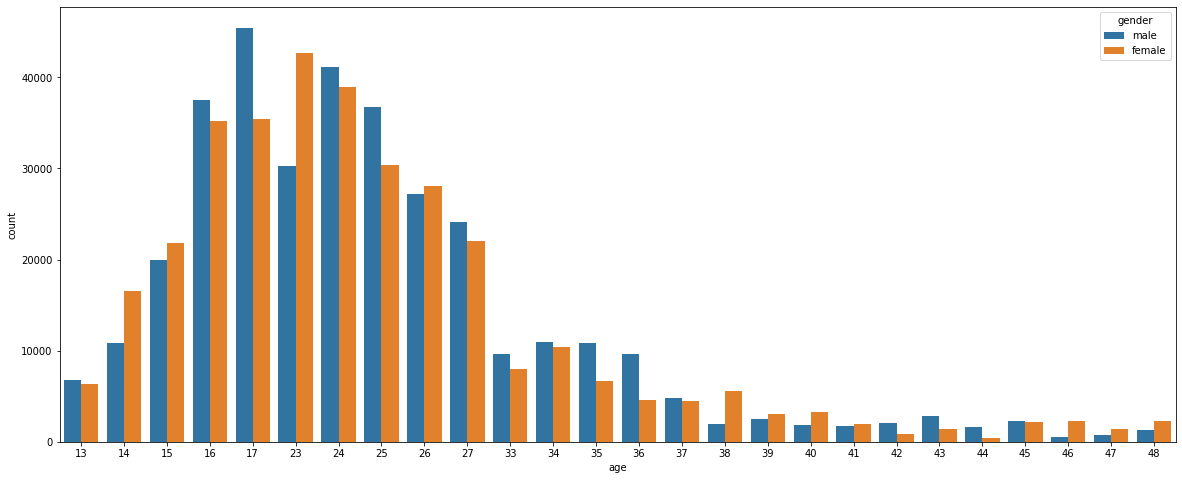

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="age", hue="gender", data=df)

Observations:

*   Almost same number of male female ratio is maintained for each age group
*   The age 17 have large number of male



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

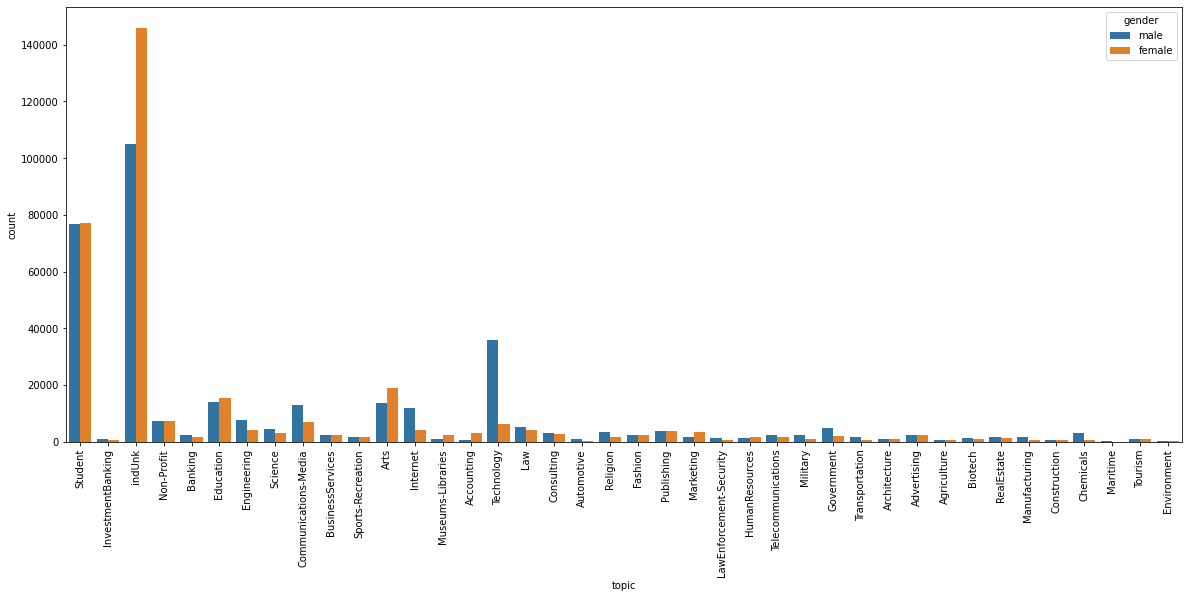

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="topic", hue="gender", data=df)
plt.xticks(rotation=90)

Observations:


*   IndUnk has large number of female
*   Student are having equal ratio of male and female



ii. Eliminate Non-English textual data. [2 Marks]

In [ ]:
#Checking for empty spaces in the text attribute
df[df.text.apply(lambda x:x.isspace() == True)]

,id,gender,age,topic,sign,date,text
716,3667495,male,15,Science,Libra,"28,June,2004",
3277,589736,male,35,Technology,Aries,"05,August,2004",
3469,589736,male,35,Technology,Aries,"05,August,2004",
3578,589736,male,35,Technology,Aries,"05,August,2004",
3626,589736,male,35,Technology,Aries,"05,August,2004",
...,...,...,...,...,...,...,...
679961,3288645,male,23,indUnk,Cancer,"27,May,2004",
680587,2383328,male,26,indUnk,Virgo,"02,August,2004",
680777,3042112,female,15,indUnk,Aquarius,"30,May,2004",
680802,3042112,female,15,indUnk,Aquarius,"04,June,2004",


In [ ]:
#Removing the records which does not contain text informations
df = df[df.text.apply(lambda x:x.isspace() != True)]

In [ ]:
# google colab crahed when taking all the records. Hence Selecting 70000 records only
df = df.sample(n=7000,random_state=1)
df.reset_index(drop=True, inplace=True)

In [ ]:
def detect_english(text):
  try:
      return detect(text) == 'en'
  except:
      return False

In [ ]:
#This method return true if its detect english and return false it anyother language
df = df[df['text'].apply(detect_english)]

2. Preprocess unstructured data to make it consumable for model training. [5 Marks]

A. Eliminate All special Characters and Numbers [2 Marks]

In [ ]:
df.shape

(6730, 7)

In [ ]:
def removeSpecialCharacterAndNumber(text):
  text = re.sub('[^A-Za-z\s]+', '', text, flags=re.MULTILINE)
  return text;

In [ ]:
df['clean_text'] = df['text'].apply(removeSpecialCharacterAndNumber)

B. Lowercase all textual data [1 Marks]

In [ ]:
def convert2lowercase(text):
  text = text.lower()
  return text

In [ ]:
df['clean_text'] = df['clean_text'].apply(convert2lowercase)

C. Remove all Stopwords [1 Marks]

In [ ]:
def removeStopWords(text):
  stopword = set(stopwords.words("english"))
  return " ".join([word for word in text.split() if word not in stopword])

In [ ]:
df['clean_text'] = df['clean_text'].apply(removeStopWords)

D. Remove all extra white spaces [1 Marks]


In [ ]:
#Remove spaces from beginning and end
df['clean_text'] = df['clean_text'].apply(lambda s: s.strip())

In [ ]:
#Ensure that no text is empty
def remove_empty_cell(text):
  try:
      return len(text)>0
  except:
      return False
df = df[df['clean_text'].apply(remove_empty_cell)]

In [ ]:
df

,id,gender,age,topic,sign,date,text,clean_text
0,1850222,female,17,indUnk,Scorpio,"29,July,2004",I'm realizing things about myself t...,im realizing things need changed interesting q...
1,2824507,male,26,Government,Libra,"23,July,2004",'Phil’s Spin Zone' returns to...,phils spin zone returns serious political comm...
2,727002,male,23,Internet,Leo,"18,April,2004",I am a mysterious dreamer. As...,mysterious dreamer world already confusing sub...
3,3470844,female,26,indUnk,Libra,"05,August,2004",We had a HUGE fight Tuesday n...,huge fight tuesday night one sent bed crying h...
4,1107146,female,16,Student,Libra,"08,June,2003","Yeh, it is. And Stranglebox i...",yeh stranglebox coming kiltz woot except alex ...
...,...,...,...,...,...,...,...,...
6995,3495165,female,25,indUnk,Cancer,"30,May,2004",After a lot of thought behind whether to bl...,lot thought behind whether blog first step fin...
6996,958176,male,17,Non-Profit,Gemini,"16,November,2003","Rosie speaks :o Yah, I reall...",rosie speaks yah really think one black cauldr...
6997,3294718,male,16,Student,Capricorn,"15,May,2004","John, the reason you don't like him is ...",john reason dont like care much people think g...
6998,1498597,male,17,Student,Pisces,"16,September,2003",[Insert Entry Post Here] .....And that...,insert entry post happened hahahah didnt tell ...


3. Build a base Classification model [8 Marks]

A. Create dependent and independent variables [2 Marks]

In [ ]:
X = df['clean_text']
y= df['topic']

In [ ]:
print("Unique categories are " ,np.unique(y))

Unique categories are  ['Accounting' 'Advertising' 'Agriculture' 'Architecture' 'Arts'
 'Automotive' 'Banking' 'Biotech' 'BusinessServices' 'Chemicals'
 'Communications-Media' 'Construction' 'Consulting' 'Education'
 'Engineering' 'Environment' 'Fashion' 'Government' 'HumanResources'
 'Internet' 'InvestmentBanking' 'Law' 'LawEnforcement-Security'
 'Manufacturing' 'Marketing' 'Military' 'Museums-Libraries' 'Non-Profit'
 'Publishing' 'RealEstate' 'Religion' 'Science' 'Sports-Recreation'
 'Student' 'Technology' 'Telecommunications' 'Tourism' 'Transportation'
 'indUnk']


In [ ]:
y.value_counts()

indUnk                     2475
Student                    1555
Technology                  438
Arts                        307
Education                   303
Communications-Media        194
Internet                    152
Non-Profit                  137
Engineering                 129
Law                          83
Government                   78
Publishing                   75
Science                      67
Consulting                   60
Marketing                    59
Fashion                      48
Advertising                  47
Religion                     43
Chemicals                    40
Banking                      40
BusinessServices             37
Military                     34
Sports-Recreation            33
Accounting                   32
Telecommunications           29
RealEstate                   29
Museums-Libraries            29
Biotech                      23
HumanResources               21
Architecture                 18
Transportation               17
Investme

Model is biased towards the indunk categories

In [ ]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
df['label_topic'] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


B. Split data into train and test. [1 Marks]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,df['label_topic'], test_size=0.2, random_state=0, stratify=y)

In [ ]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis = 1)

C. Vectorize data using any one vectorizer. [2 Marks]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
len(cv.vocabulary_)
performance_metrics={}

D. Build a base model for Supervised Learning - Classification. [2 Marks]

In [ ]:
# Create a Gaussian Classifier
model = GaussianNB()
model.fit(X_train_cv.toarray(),y_train)
pred=model.predict(X_test_cv.toarray())
print(accuracy_score(y_test, pred))
pred_prob = model.predict_proba(X_test_cv.toarray())

0.31575037147102525


E. Clearly print Performance Metrics. [1 Marks]
Ex : Accuracy, Precision, Recall, ROC-AUC
---



In [ ]:
def display_metrics_micro(p_Ytest, p_Ypred, pred_prob):
    accuracy = accuracy_score(p_Ytest, p_Ypred)
    f1 = f1_score(p_Ytest, p_Ypred, average='micro')
    precision = precision_score(p_Ytest, p_Ypred, average='micro')
    recall = recall_score(p_Ytest, p_Ypred, average='micro')
    roc_auc = roc_auc_score(p_Ytest, pred_prob, multi_class ="ovo")
    print('Accuracy score: ', accuracy)
    print('F1 score: Micro', f1)
    print('Average precision score: Micro', precision)
    print('Average recall score: Micro', recall)
    print('Average ROC_AUC score: Micro', roc_auc)
    return accuracy, f1, precision, recall, roc_auc

In [ ]:
performance_metrics["Count_Vector_GaussianNB"] = display_metrics_micro(y_test, pred, pred_prob)

Accuracy score:  0.31575037147102525
F1 score: Micro 0.31575037147102525
Average precision score: Micro 0.31575037147102525
Average recall score: Micro 0.31575037147102525
Average ROC_AUC score: Micro 0.5076348190753479


4. Improve Performance of model. [14 Marks]

A. Experiment with other vectorisers. [4 Marks]

* TF-IDF Vector

In [ ]:
tfidf= TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
model = GaussianNB()
model.fit(X_train_tfidf.toarray(),y_train)
pred=model.predict(X_test_tfidf.toarray())
print(accuracy_score(y_test, pred))
pred_prob = model.predict_proba(X_test_tfidf.toarray())

0.31946508172362553


In [ ]:
performance_metrics["TF_IDF_Vector_GaussianNB"] = display_metrics_micro(y_test, pred, pred_prob)

Accuracy score:  0.31946508172362553
F1 score: Micro 0.31946508172362553
Average precision score: Micro 0.31946508172362553
Average recall score: Micro 0.31946508172362553
Average ROC_AUC score: Micro 0.5106510217682824


* Trying with Word To Vector

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
def sent_to_word(review, tokenizer, remove_stopwords=False):
    """
    Split review into list of sentences where each sentence is a list of words.
    Removal of stop words is optional.
    """
    # use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #print(raw_sentences)
    # each sentence is furthermore split into words
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            sentences.append(raw_sentence.lower().split())
        else:
            print(raw_sentence)
    return sentences

In [ ]:
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        words = words + word.split()
    return " ".join(words)

In [ ]:
# Text normalization for Word2Vec
# RegexpTokenizer

from nltk.tokenize import word_tokenize, RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")
for df in [data_train, data_test]:
    df['clean_word'] = (df["clean_text"].apply(convert2lowercase)
                                     .apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['clean_word', 'label_topic']]

,clean_word,label_topic
2274,"[let, start, say, verizon, wireless, sucks, ca...",19
2338,"[urllink, holly, mullen, describes, utahs, rus...",21
3994,"[imagine, person, say, ghana, would, think, us...",4
4185,"[quite, week, sightings, one, however, unmista...",38
6169,"[course, many, spiritual, wanderings, introduc...",38
...,...,...
6048,"[hello, new, bloggy, century, since, last, blo...",13
2474,"[refreshingly, long, quote, friday, heres, ref...",38
4677,"[lot, say, pm, night, thanks, nap, took, late,...",38
1581,"[urllink, something, wicked, way, comesnbsp, u...",38


* Copying the google new word2vect into google colab machine

In [ ]:
!cp "/content/drive/My Drive/NLP/Assignment_1/GoogleNews-vectors-negative300.bin.gz" .

* Loading the pre-trained model

In [ ]:
# Loading the pre-trained Word2Vec model

import gensim
vector = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True);

In [ ]:
# Some useful functions for Word2Vec. If it finds word in google word2vect, then it returns embeddings, otherwise return 0. It average out the array in the sentence
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
  
    averaged = np.divide(summed, length)
  
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    if type(tokens)==str:
      embeddings = get_average_word2vec(tokens, vectors, generate_missing = generate_missing)
    elif type(tokens)==list:
      embeddings = get_average_word2vec(tokens[0], vectors, generate_missing = generate_missing)
    else:
      embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)


In [ ]:
# Word2Vec embedding for train and test
X_train_embed = get_word2vec_embeddings(vector, data_train['clean_word'])
X_test_embed = get_word2vec_embeddings(vector, data_test['clean_word'])
# Converting to Compressed Sparse Row matrix
# Scipy
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

In [ ]:
clf = GaussianNB()
clf.fit(X_train_w2v.toarray(), y_train)
pred = clf.predict(X_test_w2v.toarray())
print(accuracy_score(y_test, pred))
performance_metrics["Word2Vector_GaussianNB"] = display_metrics_micro(y_test, pred, pred_prob)

0.07057949479940565
Accuracy score:  0.07057949479940565
F1 score: Micro 0.07057949479940565
Average precision score: Micro 0.07057949479940565
Average recall score: Micro 0.07057949479940565
Average ROC_AUC score: Micro 0.5106510217682824


* Trying word2vector with different models and check the performance of each model

In [ ]:
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier"
]
models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 20, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier()
]
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val, score_f1 = pd.DataFrame(), [], [], []
    x = time.time()
    for model in models:
        print(model)
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
        f1 = f1_score(y_val, y_val_pred, average='micro')
        score_f1.append(f1)
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"], score_df["Validation f1"]= names, score_train, score_val, score_f1
    score_df.sort_values(by = 'Validation f1', ascending = False, inplace = True)
    return score_df
score(X_train_w2v, y_train, X_test_w2v, y_test, names = names, models = models)

LogisticRegression(max_iter=1000)
KNeighborsClassifier(n_jobs=-1, n_neighbors=20)
DecisionTreeClassifier()
SVC(kernel='linear')
RandomForestClassifier()
SGDClassifier()
RidgeClassifier()


,Classifier,Training accuracy,Validation accuracy,Validation f1
0,Logistic Regression,0.408584,0.387073,0.387073
4,Random Forest,0.998514,0.380386,0.380386
6,Ridge Classifier,0.421962,0.379643,0.379643
3,Linear SVM,0.382386,0.378158,0.378158
1,KNN Classifier,0.412114,0.370728,0.370728
5,SGD Classifier,0.414716,0.356612,0.356612
2,Decision Tree,0.998514,0.239227,0.239227


B. Build classifier Models using other algorithms than base model. [4 Marks]



*   As We can see that Logistic Regression is giving us best accuracy among all the models. 
* we tried with GaussianNB and getting low accuracy and now trying with LogisticRegression



In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_w2v, y_train)
pred = model.predict(X_test_w2v)
print(accuracy_score(y_test, pred))
pred_prob = model.predict_proba(X_test_w2v)

0.387072808320951


In [ ]:
performance_metrics["Word2Vector_LogisticRegression"] = display_metrics_micro(y_test, pred, pred_prob)

Accuracy score:  0.387072808320951
F1 score: Micro 0.3870728083209509
Average precision score: Micro 0.387072808320951
Average recall score: Micro 0.387072808320951
Average ROC_AUC score: Micro 0.5592986742739273


C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]

* Below, we have taken very few examples for hypertuning. 
* Note : I tried with train dataset , but it was taking near about 1 hr and then i stopped it. Due to small number of samples, accuracy goes down.

In [ ]:
X_train_less, X_test_less, y_train_less, y_test_less = train_test_split(X_train_w2v, y_train, test_size=0.6, random_state=42)
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [0.001,0.01,0.1,1,10,100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,500, 1000]
    }
]
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
logModel = LogisticRegression()

clf = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_less, y_train_less)
print (f'Accuracy - : {best_clf.score(X_test_w2v, y_test):.3f}')
best_clf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(sel

Accuracy - : 0.365


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.1, max_iter=500, solver='saga')

In [ ]:
model = best_clf.best_estimator_
model.fit(X_train_w2v, y_train)
pred = model.predict(X_test_w2v)
print(accuracy_score(y_test, pred))
pred_prob = model.predict_proba(X_test_w2v)

0.37295690936106984


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


D. Clearly print Performance Metrics. [2 Marks]

In [ ]:
performance_metrics['Word2Vector_Hypertuned_LogisticRegression'] = display_metrics_micro(y_test, pred, pred_prob)

Accuracy score:  0.37295690936106984
F1 score: Micro 0.37295690936106984
Average precision score: Micro 0.37295690936106984
Average recall score: Micro 0.37295690936106984
Average ROC_AUC score: Micro 0.5240013271829087


In [ ]:
performance_metrics.keys()

dict_keys(['Count_Vector_GaussianNB', 'TF_IDF_Vector_GaussianNB', 'Word2Vector_GaussianNB', 'Word2Vector_LogisticRegression', 'Word2Vector_Hypertuned_LogisticRegression'])

5. Share insights on relative performance comparison [8 Marks]

In [ ]:
pd.DataFrame(performance_metrics.values(), columns=['Accuracy', 'f1', 'precision','recall','roc_auc'], index= performance_metrics.keys())

,Accuracy,f1,precision,recall,roc_auc
Count_Vector_GaussianNB,0.315750,0.315750,0.315750,0.315750,0.507635
TF_IDF_Vector_GaussianNB,0.319465,0.319465,0.319465,0.319465,0.510651
Word2Vector_GaussianNB,0.070579,0.070579,0.070579,0.070579,0.510651
Word2Vector_LogisticRegression,0.387073,0.387073,0.387073,0.387073,0.559299
Word2Vector_Hypertuned_LogisticRegression,0.372957,0.372957,0.372957,0.372957,0.524001


A. Which vectorizer performed better? Probable reason?.
[2 Marks]



*   Word vectorizer is giving the best accuracy. 
*   It preserve the meaning of the words. 
*   It has very less embedding-vector size compared to TF-IDF, CountVector.







B. Which model outperformed? Probable reason? [2 Marks]



*   Logistics Regression performed better than other models GaussianNB. 
*   Logistics Regression is giving better accuracy 38% compared to gaussianNB of 7% with word2Vec.
*   GaussianNB is giving better performance with TF-IDF compared to Word2Vec

Note: Due to limited number of memory, I could not performed hypertuning with different models. and even taking very small amount of data for hypertuning. I tried with around 5K records, But Logistics Regression took more than 1 hr and even didnot finish. So I decided to decrease the records and do the hypertuning







C. Which parameter/hyperparameter significantly helped
to improve performance?Probable reason?.

*   Best Hyperparameters: C=0.1, max_iter=500, solver='saga'
*   During hypertuning , model is tried with different combination of parameters. So based on the dataset, it tried different combination and check which combinations are giving the best accuracy. So everytime, when we do hypertuning , accuracy increases. 



D. According to you, which performance metric should be
given most importance, why?. [2 Marks]

* AUC Score or F1 score is better performance metrics compared to accuracy. The reason behind is Dataset is not balanced. If the dataset is balanced, then we can focus on accuracy. In our case, we have taken performance metrics as ROC-AUC Score

### PART B

Since this dataset is not balanced. Hence accuracy is not a good metrics to measure. We should go with ROC_AUC_SCORE or F1 score.

DOMAIN: Customer support
• CONTEXT: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.
• DATA DESCRIPTION: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.
• PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:

In [ ]:
# Copy the file in google colab machine
!cp "/content/drive/My Drive/NLP/Assignment_1/GL Bot.json" .

Read the json file and convert it into Dataframe

In [ ]:
with open('GL Bot.json') as data_file:
    jsonobj = json.load(data_file)
gl_bot_df = pd.DataFrame(jsonobj['intents'])

Conver the label into numerical value based on LabelEncoder

In [ ]:
le = LabelEncoder()
gl_bot_df['label']=le.fit_transform(gl_bot_df['tag'])

Method used to convert the sentence into words. It also remove the punctuations and stopwords

In [ ]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [token for token in tokens if token not in stopwords.words("english")]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

Prepare dataframe with X as questions and y as tag

In [ ]:
doc_y=[]
doc_x_sent = []
for index, row in gl_bot_df.iterrows():
  for pattern in row['patterns']:
    doc_y.append(row['label'])
    doc_x_sent.append(pattern)


In [ ]:
df = pd.DataFrame()
df['comments'] =doc_x_sent
df['tag']= doc_y

Print the top 5 comments with its tags

In [ ]:
df.head()

,comments,tag
0,hi,2
1,how are you,2
2,is anyone there,2
3,hello,2
4,whats up,2


* Split into train test split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(df['comments'], df['tag'], test_size=0.2, stratify=df['tag'] ,random_state=42)

* Concat X_train, y_train and X_test, y_test 

In [ ]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis = 1)

* Convert Sentences to lower case word array

In [ ]:
# Text normalization for Word2Vec
# RegexpTokenizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")
for df in [data_train, data_test]:
    df['comments'] = (df["comments"].apply(convert2lowercase)
                                     .apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['comments', 'tag']]

,comments,tag
34,"[too, good]",1
64,"[supervised, learning]",6
105,"[when, are, your, hours, of, opertions]",0
82,"[not, able, to, understand, neural, nets]",3
74,"[ada, boosting]",6
...,...,...
52,"[i, am, not, able, to, understand, logistic, r...",6
85,[ann],3
122,"[bad, solution]",7
37,"[explain, me, how, olympus, works]",4


* Convert words embedding from sentences

In [ ]:
# Word2Vec embedding for train and test
X_train_embed = get_word2vec_embeddings(vector, data_train['comments'])
X_test_embed = get_word2vec_embeddings(vector, data_test['comments'])

In [ ]:
# Converting to Compressed Sparse Row matrix
# Scipy
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

* Find the best model amongs the listed models

In [ ]:

names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]
models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 20, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [ ]:
score(X_train_w2v, y_train, X_test_w2v, y_test, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
3,Linear SVM,0.911765,0.653846
5,SGD Classifier,0.970588,0.576923
6,Ridge Classifier,0.950980,0.576923
0,Logistic Regression,0.901961,0.538462
7,XGBoost,0.970588,0.538462
4,Random Forest,0.970588,0.461538
2,Decision Tree,0.970588,0.384615
1,KNN Classifier,0.382353,0.307692
8,AdaBoost,0.333333,0.307692


* Linear SVM is giving best accuracy.


* Doing hypertuning to get the better performance of model

In [ ]:
param_grid = { 'C':[0.1,1,2,3,4,5,10,20,30,40,50,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
svr = svm.SVC()
clf = GridSearchCV(svr, param_grid,cv=5)
clf.fit(X_train_w2v, y_train)
print(clf.best_params_)
model = clf.best_estimator_
y_pred = model.predict(X_test_w2v.toarray())
print (f'Accuracy - : {accuracy_score( y_test, y_pred):.3f}')

{'C': 4, 'degree': 1, 'kernel': 'poly'}
Accuracy - : 0.692


* Method to get the response back 

In [ ]:
def bot_response(user_response):
  user_response = convert2lowercase(user_response)
  user_response = convert_contractions(user_response)
  user_response = regexp.tokenize(user_response);
  
  user_response_embed = get_word2vec_embeddings(vector, [user_response])
  user_response_embed_w2v = scipy.sparse.csr_matrix(user_response_embed)
  pred=model.predict(user_response_embed_w2v.toarray())
  tag = le.inverse_transform([pred[0]])
  return gl_bot_df[gl_bot_df.tag==tag[0]].responses, tag

In [ ]:
flag=True
print("BOT: My name is BOT. Let's have a conversation! Also, if you want to exit any time, just type Bye!")
while(flag==True):
    user_resp = input()
    user_resp=user_resp.lower()
    print("BOT: ",end="")
    bot_text_response, tag = bot_response(user_resp)
    print(bot_text_response)
    if tag =='Exit':
      flag=False
      print("BOT: Goodbye! Take care <3 ")

BOT: My name is BOT. Let's have a conversation! Also, if you want to exit any time, just type Bye!
Hello
BOT: 0    [Hello! how can i help you ?]
Name: responses, dtype: object
How are you
BOT: 5    [I am your virtual learning assistant]
Name: responses, dtype: object
name please
BOT: 5    [I am your virtual learning assistant]
Name: responses, dtype: object
no access to olympus
BOT: 2    [Link: Olympus wiki]
Name: responses, dtype: object
how machine learning works
BOT: 4    [Link: Neural Nets wiki]
Name: responses, dtype: object
bad solution
BOT: 7    [Tarnsferring the request to your PM]
Name: responses, dtype: object
useless you are
BOT: 6    [Please use respectful words]
Name: responses, dtype: object
what is adam
BOT: 4    [Link: Neural Nets wiki]
Name: responses, dtype: object
what is forward propagation
BOT: 4    [Link: Neural Nets wiki]
Name: responses, dtype: object
working hours
BOT: 5    [I am your virtual learning assistant]
Name: responses, dtype: object
what the hell
BOT:

Observations:

```
# Accuracy is not too good.Use Word2Vect with deep learning.
# Use LSTM , transformers.
# Give more number of input to the models for better understanding.
```

